In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
np.set_printoptions(2)

### Using SDGRegressor and StandardScalar

In [10]:
data = np.loadtxt(".\houses.txt", delimiter=',')
print(data)
X_train = np.array(data[:,:4])
X_featurs = np.array(['size(sq)','bedrooms','floors','age'])
y_train = np.array(data[:,4])


[[9.52e+02 2.00e+00 1.00e+00 6.50e+01 2.72e+02]
 [1.24e+03 3.00e+00 1.00e+00 6.40e+01 3.00e+02]
 [1.95e+03 3.00e+00 2.00e+00 1.70e+01 5.10e+02]
 [1.72e+03 3.00e+00 2.00e+00 4.20e+01 3.94e+02]
 [1.96e+03 3.00e+00 2.00e+00 1.50e+01 5.40e+02]
 [1.31e+03 2.00e+00 1.00e+00 1.40e+01 4.15e+02]
 [8.64e+02 2.00e+00 1.00e+00 6.60e+01 2.30e+02]
 [1.84e+03 3.00e+00 1.00e+00 1.70e+01 5.60e+02]
 [1.03e+03 3.00e+00 1.00e+00 4.30e+01 2.94e+02]
 [3.19e+03 4.00e+00 2.00e+00 8.70e+01 7.18e+02]
 [7.88e+02 2.00e+00 1.00e+00 8.00e+01 2.00e+02]
 [1.20e+03 2.00e+00 2.00e+00 1.70e+01 3.02e+02]
 [1.56e+03 2.00e+00 1.00e+00 1.80e+01 4.68e+02]
 [1.43e+03 3.00e+00 1.00e+00 2.00e+01 3.74e+02]
 [1.22e+03 2.00e+00 1.00e+00 1.50e+01 3.88e+02]
 [1.09e+03 2.00e+00 1.00e+00 6.40e+01 2.82e+02]
 [8.48e+02 1.00e+00 1.00e+00 1.70e+01 3.12e+02]
 [1.68e+03 3.00e+00 2.00e+00 2.30e+01 4.01e+02]
 [1.77e+03 3.00e+00 2.00e+00 1.80e+01 4.50e+02]
 [1.04e+03 3.00e+00 1.00e+00 4.40e+01 3.01e+02]
 [1.65e+03 2.00e+00 1.00e+00 2.10e+01 5.

<>:1: SyntaxWarning: invalid escape sequence '\h'
<>:1: SyntaxWarning: invalid escape sequence '\h'
C:\Users\chitr\AppData\Local\Temp\ipykernel_20112\413298073.py:1: SyntaxWarning: invalid escape sequence '\h'
  data = np.loadtxt(".\houses.txt", delimiter=',')


In [11]:
scalar = StandardScaler()
X_norm = scalar.fit_transform(X_train) # it transform the values of X_train =[(x-mean)/std.Deviation]
print(X_norm)

[[-1.12 -1.09 -0.78  1.02]
 [-0.41  0.44 -0.78  0.98]
 [ 1.29  0.44  1.28 -0.84]
 [ 0.76  0.44  1.28  0.13]
 [ 1.32  0.44  1.28 -0.92]
 [-0.24 -1.09 -0.78 -0.96]
 [-1.33 -1.09 -0.78  1.06]
 [ 1.02  0.44 -0.78 -0.84]
 [-0.94  0.44 -0.78  0.17]
 [ 4.32  1.98  1.28  1.88]
 [-1.52 -1.09 -0.78  1.6 ]
 [-0.52 -1.09  1.28 -0.84]
 [ 0.35 -1.09 -0.78 -0.8 ]
 [ 0.04  0.44 -0.78 -0.72]
 [-0.47 -1.09 -0.78 -0.92]
 [-0.78 -1.09 -0.78  0.98]
 [-1.37 -2.62 -0.78 -0.84]
 [ 0.65  0.44  1.28 -0.61]
 [ 0.86  0.44  1.28 -0.8 ]
 [-0.91  0.44 -0.78  0.21]
 [ 0.58 -1.09 -0.78 -0.68]
 [-0.79 -1.09 -0.78 -0.14]
 [-0.24  0.44 -0.78 -0.96]
 [ 0.43 -4.15 -0.78 -0.72]
 [-1.07 -1.09 -0.78  1.33]
 [-0.77  0.44 -0.78 -0.06]
 [-0.99 -1.09 -0.78  0.48]
 [-1.24  0.44 -0.78  0.63]
 [ 0.68  0.44 -0.78 -0.99]
 [-0.83 -1.09 -0.78  2.38]
 [ 0.01  0.44  1.28 -0.76]
 [-0.61  0.44 -0.78  0.52]
 [ 1.26  0.44  1.28 -1.03]
 [-0.48 -1.09  1.28  1.37]
 [ 2.59  1.98  1.28 -0.88]
 [-0.52 -1.09 -0.78 -0.8 ]
 [ 1.03  0.44  1.28 -0.72]
 

In [12]:
print(f'Peak to Peak range by column in X_train: {np.ptp(X_train,axis=0)}')
print(f'Peak to Peak range by column is X_norm : {np.ptp(X_norm, axis = 0)}')

Peak to Peak range by column in X_train: [2.41e+03 4.00e+00 1.00e+00 9.50e+01]
Peak to Peak range by column is X_norm : [5.84 6.13 2.06 3.68]


In [13]:
sgdr = SGDRegressor(max_iter=1000) # caculates the value of weight.
sgdr.fit(X_norm,y_train)

,loss,'squared_error'
,penalty,'l2'
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1000
,tol,0.001
,shuffle,True
,verbose,0
,epsilon,0.1
,random_state,None


In [14]:
b_norm = sgdr.intercept_
w_norm = sgdr.coef_
print(f"weight : {w_norm} \n bias: {b_norm}")

weight : [110.23 -21.27 -32.44 -37.86] 
 bias: [362.24]


In [15]:
# making prediction
y_pred = np.dot(X_norm,w_norm) + b_norm
print(y_pred)

# we can do the same thing using SGDRegression module
y_pred_sgdr = sgdr.predict(X_norm)
print(y_pred_sgdr)

# by both the methods we got the same result.


[248.61 295.57 485.76 389.68 491.91 420.31 223.61 522.9  268.11 683.87
 182.73 318.59 479.42 409.92 393.7  287.52 323.88 406.08 436.42 270.38
 500.42 329.03 388.24 551.3  242.22 295.91 283.08 217.86 490.8  229.58
 341.62 291.8  489.89 239.17 597.71 383.95 452.74 401.36 406.07 173.31
 423.61 434.25 277.43 229.58 448.42 488.83 332.35 465.54 222.52 386.79
 456.44 370.57 468.72 310.59 426.54 391.96 347.92 339.52 471.29 243.95
 298.66 273.37 250.42 298.28 335.15 376.15 289.29 229.58 620.19 352.93
 510.79 364.19 363.41 298.28 407.25 288.99 386.13 488.05 261.45 259.67
 427.67 238.71 355.92 340.03 390.49 381.86 220.79 434.25 243.96 465.54
 186.74 341.63 410.16 445.48 232.57 332.35 409.28 406.07 351.62 274.82]
[248.61 295.57 485.76 389.68 491.91 420.31 223.61 522.9  268.11 683.87
 182.73 318.59 479.42 409.92 393.7  287.52 323.88 406.08 436.42 270.38
 500.42 329.03 388.24 551.3  242.22 295.91 283.08 217.86 490.8  229.58
 341.62 291.8  489.89 239.17 597.71 383.95 452.74 401.36 406.07 173.31
 423.

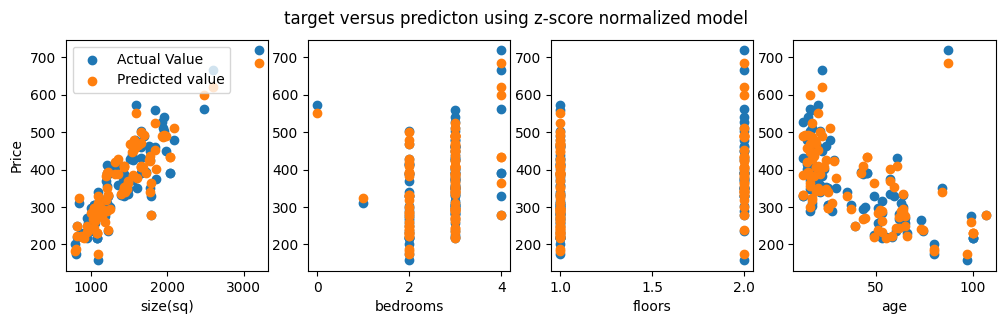

In [16]:
# ploting our predictions

fig, ax = plt.subplots(1,4,figsize=(12,3))

for i in range(len(ax)):
    ax[i].scatter(X_train[:,i],y_train,label = "Actual Value")
    ax[i].set_xlabel(X_featurs[i])
    ax[i].scatter(X_train[:,i], y_pred, label="Predicted value")
ax[0].set_ylabel("Price")
ax[0].legend()
fig.suptitle("target versus predicton using z-score normalized model")
plt.show()

# Using Linear Regression

In [17]:
from sklearn.linear_model import LinearRegression

In [21]:
print(X_train)
print(len(X_train))

[[9.52e+02 2.00e+00 1.00e+00 6.50e+01]
 [1.24e+03 3.00e+00 1.00e+00 6.40e+01]
 [1.95e+03 3.00e+00 2.00e+00 1.70e+01]
 [1.72e+03 3.00e+00 2.00e+00 4.20e+01]
 [1.96e+03 3.00e+00 2.00e+00 1.50e+01]
 [1.31e+03 2.00e+00 1.00e+00 1.40e+01]
 [8.64e+02 2.00e+00 1.00e+00 6.60e+01]
 [1.84e+03 3.00e+00 1.00e+00 1.70e+01]
 [1.03e+03 3.00e+00 1.00e+00 4.30e+01]
 [3.19e+03 4.00e+00 2.00e+00 8.70e+01]
 [7.88e+02 2.00e+00 1.00e+00 8.00e+01]
 [1.20e+03 2.00e+00 2.00e+00 1.70e+01]
 [1.56e+03 2.00e+00 1.00e+00 1.80e+01]
 [1.43e+03 3.00e+00 1.00e+00 2.00e+01]
 [1.22e+03 2.00e+00 1.00e+00 1.50e+01]
 [1.09e+03 2.00e+00 1.00e+00 6.40e+01]
 [8.48e+02 1.00e+00 1.00e+00 1.70e+01]
 [1.68e+03 3.00e+00 2.00e+00 2.30e+01]
 [1.77e+03 3.00e+00 2.00e+00 1.80e+01]
 [1.04e+03 3.00e+00 1.00e+00 4.40e+01]
 [1.65e+03 2.00e+00 1.00e+00 2.10e+01]
 [1.09e+03 2.00e+00 1.00e+00 3.50e+01]
 [1.32e+03 3.00e+00 1.00e+00 1.40e+01]
 [1.59e+03 0.00e+00 1.00e+00 2.00e+01]
 [9.72e+02 2.00e+00 1.00e+00 7.30e+01]
 [1.10e+03 3.00e+00 1.00e

In [28]:
print((X_train)[0:4])

[[9.52e+02 2.00e+00 1.00e+00 6.50e+01]
 [1.24e+03 3.00e+00 1.00e+00 6.40e+01]
 [1.95e+03 3.00e+00 2.00e+00 1.70e+01]
 [1.72e+03 3.00e+00 2.00e+00 4.20e+01]]


In [22]:
print(y_train)
print(len(y_train))

[271.5  300.   509.8  394.   540.   415.   230.   560.   294.   718.2
 200.   302.   468.   374.2  388.   282.   311.8  401.   449.8  301.
 502.   340.   400.28 572.   264.   304.   298.   219.8  490.7  216.96
 368.2  280.   526.87 237.   562.43 369.8  460.   374.   390.   158.
 426.   390.   277.77 216.96 425.8  504.   329.   464.   220.   358.
 478.   334.   426.98 290.   463.   390.8  354.   350.   460.   237.
 288.3  282.   249.   304.   332.   351.8  310.   216.96 666.34 330.
 480.   330.3  348.   304.   384.   316.   430.4  450.   284.   275.
 414.   258.   378.   350.   412.   373.   225.   390.   267.4  464.
 174.   340.   430.   440.   216.   329.   388.   390.   356.   257.8 ]
100


In [25]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train) 

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [26]:
b = linear_model.intercept_
w = linear_model.coef_
print(f'w: {w}, b: {b}')

w: [  0.27 -32.9  -67.29  -1.47], b: 221.50226366888356


In [35]:
print(f"Prediction on training set: \n {linear_model.predict(X_train[0:4])}")
print(f"Prediction using w,b: \n {(X_train @ w + b)[0:4]}")
print(f'Target values \n {y_train[0:4]}')

x_house = np.array([[1200, 3,1,40]])
x_house_predict = linear_model.predict(x_house)[0]
print(f"Predicted Prize of a house with 1200 sq feet 3 bedrooms, 1 floor, 40 year old = ${x_house_predict*1000:0.2f}")

Prediction on training set: 
 [248.66 295.58 485.82 389.61]
Prediction using w,b: 
 [248.66 295.58 485.82 389.61]
Target values 
 [271.5 300.  509.8 394. ]
Predicted Prize of a house with 1200 sq feet 3 bedrooms, 1 floor, 40 year old = $318936.36
